In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df1 = pd.read_csv(r"C:\Users\adarshshetty\Desktop\Datascience\DataSets\premier-league\results.csv")
df1.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [3]:
df1.describe()

,home_goals,away_goals
count,4560.000000,4560.000000
mean,1.543202,1.144298
std,1.315163,1.139824
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,7.000000


In [19]:
df2 = df1.drop(['home_goals','away_goals','season'],axis='columns')

In [20]:
df2.head()

,home_team,away_team,result
0,Sheffield United,Liverpool,D
1,Arsenal,Aston Villa,D
2,Everton,Watford,H
3,Newcastle United,Wigan Athletic,H
4,Portsmouth,Blackburn Rovers,H


In [21]:
df2.result.unique()

array(['D', 'H', 'A'], dtype=object)

In [24]:
df3 = df2.copy()
df3['result'] = df2.result.apply(lambda x: 0 if x=='A' else 1 if x=='D' else 2)

In [25]:
df3.head(5)

,home_team,away_team,result
0,Sheffield United,Liverpool,1
1,Arsenal,Aston Villa,1
2,Everton,Watford,2
3,Newcastle United,Wigan Athletic,2
4,Portsmouth,Blackburn Rovers,2


In [26]:
df3.home_team.unique()

array(['Sheffield United', 'Arsenal', 'Everton', 'Newcastle United',
       'Portsmouth', 'Reading', 'West Ham United', 'Bolton Wanderers',
       'Manchester United', 'Chelsea', 'Watford', 'Tottenham Hotspur',
       'Aston Villa', 'Manchester City', 'Blackburn Rovers',
       'Charlton Athletic', 'Fulham', 'Middlesbrough', 'Liverpool',
       'Wigan Athletic', 'Sunderland', 'Derby County', 'Birmingham City',
       'Hull City', 'Stoke City', 'West Bromwich Albion',
       'Wolverhampton Wanderers', 'Burnley', 'Blackpool',
       'Queens Park Rangers', 'Swansea City', 'Norwich City',
       'Southampton', 'Crystal Palace', 'Cardiff City', 'Leicester City',
       'AFC Bournemouth', 'Brighton and Hove Albion', 'Huddersfield Town'],
      dtype=object)

In [27]:
df3.away_team.unique()

array(['Liverpool', 'Aston Villa', 'Watford', 'Wigan Athletic',
       'Blackburn Rovers', 'Middlesbrough', 'Charlton Athletic',
       'Tottenham Hotspur', 'Fulham', 'Manchester City',
       'West Ham United', 'Sheffield United', 'Reading', 'Portsmouth',
       'Everton', 'Manchester United', 'Bolton Wanderers', 'Chelsea',
       'Arsenal', 'Newcastle United', 'Birmingham City', 'Sunderland',
       'Derby County', 'West Bromwich Albion', 'Stoke City', 'Hull City',
       'Burnley', 'Wolverhampton Wanderers', 'Blackpool', 'Norwich City',
       'Swansea City', 'Queens Park Rangers', 'Southampton',
       'Cardiff City', 'Crystal Palace', 'Leicester City',
       'AFC Bournemouth', 'Huddersfield Town', 'Brighton and Hove Albion'],
      dtype=object)

In [34]:
home_dummies = pd.get_dummies("home_"+df3.home_team)

In [35]:
home_dummies.head(5)

,home_AFC Bournemouth,home_Arsenal,home_Aston Villa,home_Birmingham City,home_Blackburn Rovers,home_Blackpool,home_Bolton Wanderers,home_Brighton and Hove Albion,home_Burnley,home_Cardiff City,...,home_Southampton,home_Stoke City,home_Sunderland,home_Swansea City,home_Tottenham Hotspur,home_Watford,home_West Bromwich Albion,home_West Ham United,home_Wigan Athletic,home_Wolverhampton Wanderers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df4 = pd.concat([df3,home_dummies],axis='columns')

In [37]:
df4.head(5)

,home_team,away_team,result,home_AFC Bournemouth,home_Arsenal,home_Aston Villa,home_Birmingham City,home_Blackburn Rovers,home_Blackpool,home_Bolton Wanderers,...,home_Southampton,home_Stoke City,home_Sunderland,home_Swansea City,home_Tottenham Hotspur,home_Watford,home_West Bromwich Albion,home_West Ham United,home_Wigan Athletic,home_Wolverhampton Wanderers
0,Sheffield United,Liverpool,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arsenal,Aston Villa,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Everton,Watford,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Newcastle United,Wigan Athletic,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Portsmouth,Blackburn Rovers,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
away_dummies = pd.get_dummies("away_"+df4.away_team)

In [40]:
away_dummies.head(5)

,away_AFC Bournemouth,away_Arsenal,away_Aston Villa,away_Birmingham City,away_Blackburn Rovers,away_Blackpool,away_Bolton Wanderers,away_Brighton and Hove Albion,away_Burnley,away_Cardiff City,...,away_Southampton,away_Stoke City,away_Sunderland,away_Swansea City,away_Tottenham Hotspur,away_Watford,away_West Bromwich Albion,away_West Ham United,away_Wigan Athletic,away_Wolverhampton Wanderers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df5 = pd.concat([df4,away_dummies],axis='columns')

In [42]:
df5.head(3)

,home_team,away_team,result,home_AFC Bournemouth,home_Arsenal,home_Aston Villa,home_Birmingham City,home_Blackburn Rovers,home_Blackpool,home_Bolton Wanderers,...,away_Southampton,away_Stoke City,away_Sunderland,away_Swansea City,away_Tottenham Hotspur,away_Watford,away_West Bromwich Albion,away_West Ham United,away_Wigan Athletic,away_Wolverhampton Wanderers
0,Sheffield United,Liverpool,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arsenal,Aston Villa,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Everton,Watford,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
df5.drop(['home_team','away_team'],axis='columns',inplace=True)

In [45]:
df5.head(3)

,result,home_AFC Bournemouth,home_Arsenal,home_Aston Villa,home_Birmingham City,home_Blackburn Rovers,home_Blackpool,home_Bolton Wanderers,home_Brighton and Hove Albion,home_Burnley,...,away_Southampton,away_Stoke City,away_Sunderland,away_Swansea City,away_Tottenham Hotspur,away_Watford,away_West Bromwich Albion,away_West Ham United,away_Wigan Athletic,away_Wolverhampton Wanderers
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
df5.shape

(4560, 79)

In [51]:
win_percent = df5.groupby('result')['result'].agg('count')

In [52]:
win_percent

result
0    1288
1    1164
2    2108
Name: result, dtype: int64

In [53]:
vals = [1288,1164,2108]
labels = ['Away_win','Draw','Home_win']

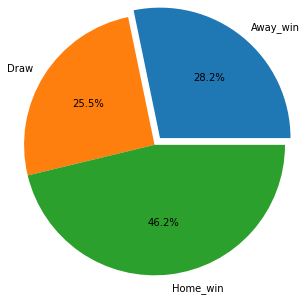

In [64]:
plt.pie(vals,labels=labels,radius=1.5,autopct='%0.1f%%',explode=[0.1,0,0])
plt.show()

In [65]:
X = df5.drop(['result'],axis='columns')
y = df5.result

In [69]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [70]:
len(X_train)

3192

In [71]:
len(X_test)

1368

In [117]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [126]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'C' : [1,5,10],
            }
        },
        'mutinomial_NB': {
            'model': MultinomialNB(),
            'params': {
            }
        },
        'svc': {
            'model': SVC(),
            'params': {
                'kernel':['linear','rbf'],
                'C':[1,5,10],
                'gamma':['auto']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)

c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,model,best_score,best_params
0,linear_regression,0.148463,{'normalize': True}
1,logistic_regression,0.523246,{'C': 1}
2,mutinomial_NB,0.525658,{}
3,svc,0.522588,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"


In [129]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)
mnb_model.score(X_test,y_test)

0.5211988304093568

In [128]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=0)
cross_val_score(MultinomialNB(),X,y,cv=cv)

array([0.51754386, 0.53179825, 0.50657895, 0.54495614, 0.52741228])

In [123]:
def predict_winner(home,away):    
    loc_home = np.where(X.columns==home)[0][0]
    loc_away = np.where(X.columns==away)[0][0]
    
    x = np.zeros(len(X.columns))
    if loc_home >= 0:
        x[loc_home] = 1
    if loc_away >= 0:
        x[loc_away] = 1
    

    return mnb_model.predict([x])[0]

In [124]:
predict_winner('home_West Ham United','away_Chelsea')

0

In [130]:
predict_winner('home_Manchester City','away_Chelsea')

2

In [131]:
import pickle
with open('PremierLeague_prediction.pickle','wb')as f:
    pickle.dump(mnb_model,f)

In [132]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))